In [2]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#loading the dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#checking lenght of training data
len(X_train)

60000

In [4]:
#checking lenght of testing data
len(X_test)

10000

In [7]:
#sample
X_train[0].shape

(28, 28)

In [5]:
#weights represented are simple 2D array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

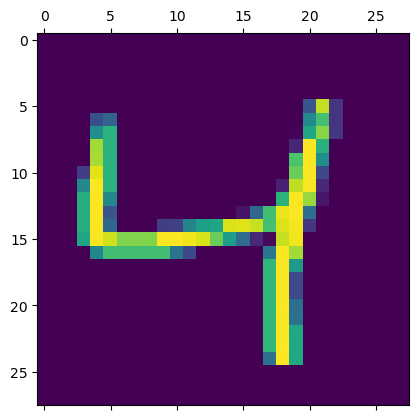

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#Flattening the data in the MNIST dataset is necessary to convert the 
#original 28x28 matrix representing each image into a one-dimensional array.
#This is primarily done because many neural network architectures, such as 
#feedforward networks, expect one-dimensional input. By flattening the data, 
#it becomes compatible with fully connected layers in the neural network, 
#which typically require one-dimensional input 

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape


(60000, 784)

In [13]:
X_test_flattened.shape

(10000, 784)

In [14]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4636 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2727 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9248


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9257


[0.2668769955635071, 0.9257000088691711]

In [17]:
model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


array([[2.16429420e-02, 4.17584715e-07, 4.40685712e-02, ...,
        9.99651849e-01, 1.03024624e-01, 7.05891788e-01],
       [4.25795823e-01, 4.09705844e-03, 9.99021351e-01, ...,
        7.96159904e-13, 1.33982137e-01, 2.38636022e-09],
       [3.49835580e-04, 9.93137956e-01, 6.00437939e-01, ...,
        1.28556684e-01, 3.75447303e-01, 4.51803394e-02],
       ...,
       [2.72111924e-06, 6.92011645e-06, 9.36904340e-04, ...,
        1.88391194e-01, 5.31337559e-01, 8.06764781e-01],
       [1.20247416e-04, 2.10843253e-04, 1.18854943e-04, ...,
        2.26583252e-05, 5.81770897e-01, 1.05836312e-04],
       [6.39930228e-03, 3.49405532e-10, 1.57997385e-01, ...,
        1.42945584e-08, 1.57328977e-04, 9.17143097e-07]], dtype=float32)

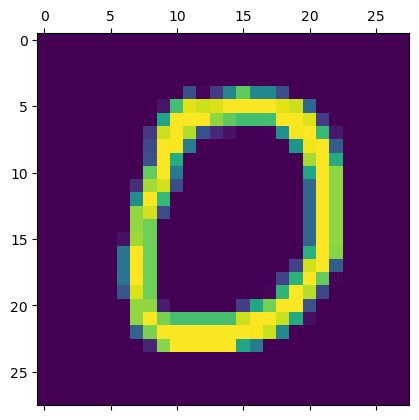

In [18]:
plt.matshow(X_test[10])

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[10]

313/313 [==============================] - 1s 2ms/step


array([9.9881607e-01, 2.2428959e-07, 4.5571664e-01, 1.1840548e-01,
       1.7278017e-04, 8.5440898e-01, 2.9710891e-02, 2.1860043e-05,
       5.9693068e-01, 6.1811379e-04], dtype=float32)

In [20]:
np.argmax(y_predicted[10])

0

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,   10,  917,   17,    9,    4,   12,   11,   41,    4],
       [   3,    0,   16,  921,    1,   26,    2,   10,   22,    9],
       [   1,    2,    4,    1,  924,    0,    9,    3,    9,   29],
       [   9,    3,    2,   32,   12,  777,   14,    7,   30,    6],
       [  10,    3,    5,    1,    8,   15,  912,    2,    2,    0],
       [   2,    7,   21,    5,   10,    1,    0,  938,    3,   41],
       [   6,    9,    5,   19,   10,   26,    9,    9,  874,    7],
       [  11,    7,    1,   10,   37,    6,    0,   15,    5,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

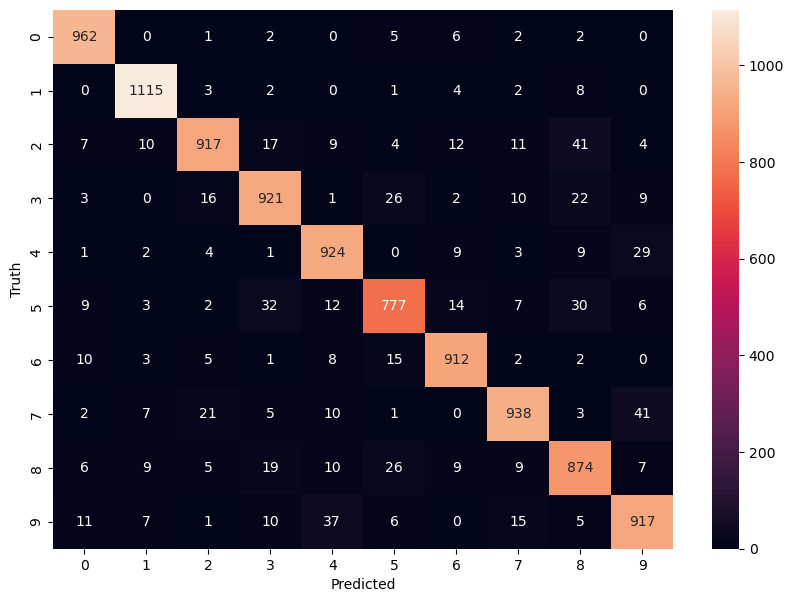

In [24]:
import seaborn as sn
plt.figure(figsize =( 10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2740 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1243 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0860 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0522 - accuracy: 0.9840


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9758


[0.07992151379585266, 0.9757999777793884]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize =( 10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1250 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0655 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9838


In [29]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [30]:
model.get_weights()

[array([[-0.03960446,  0.05413486,  0.06721412, ...,  0.07640377,
          0.00342326, -0.04065363],
        [ 0.07007128, -0.07047744, -0.04294141, ...,  0.00877589,
          0.07449347, -0.03068809],
        [-0.06428871, -0.05708347,  0.03241884, ..., -0.00972725,
          0.07505637, -0.06886993],
        ...,
        [ 0.02741317,  0.05386248, -0.07772731, ...,  0.02617141,
          0.02477431,  0.07329755],
        [ 0.00710277,  0.04296015, -0.0069996 , ...,  0.08052225,
         -0.06810632, -0.01409497],
        [ 0.05216911, -0.02791921, -0.02232035, ..., -0.05796805,
         -0.01410257,  0.07498169]], dtype=float32),
 array([-0.02277737,  0.22867301, -0.02736345,  0.02435035,  0.07642107,
        -0.00182993, -0.04863133,  0.10242638, -0.0580086 , -0.07218739,
        -0.00642511,  0.06008911,  0.05346753,  0.28772286, -0.1146846 ,
         0.05806224,  0.01651376,  0.12924589,  0.11420372,  0.05634042,
        -0.08949957, -0.00725094,  0.26281682,  0.18969876, -0.089